# Teorema de Divergente (Gauss)

o Teorema do Divergente liga integrais de superfície de campos de vetores a triplas integrais através da divergência.

**Teorema:**

Seja E uma região sólida simples e seja S a superfície fronteira de E, orientada positivamente (para fora). Seja $\vec F$ um campo vetorial cujas funções componentes tenham derivadas parciais continuas em uma região aberta que contenha E. Então
$$
\iint_S \vec F \cdot \text{d} \vec S = \iiint_E \text{div} \vec F \; \text{d}V
$$
Portanto, o Teorema do Divergente afirma que, sob as condições dadas, o fluxo de $\vec F$ pela fronteira de E é igual à integral tripla da divergência de $\vec F$ em E.

## Preamble

In [1]:
import sympy as sp
import numpy as np
import sympy.vector as sv
import plotly.graph_objects as go
import pandas as pd
import av_utils as av


sp.init_printing()

R = sv.CoordSys3D('R')

t,s,x,y,z, rho, theta, phi,r = sp.symbols('t s x y z rho theta phi r', real=True)

## Exemplo: 

Determine o fluxo do campo vetorial $\vec F(x,y,z) = z \hat i + y \hat j + x \hat k$ sobre a unidade esferica $x^2 + y^2 + z^2 = 1$

**Solução:**

Primeiro calculamos o divergente do campo vetoril $\vec F$

In [2]:
def field(x,y,z):
    return z*R.i + y*R.j + x*R.k

In [3]:
div = av.divergence(field(x,y,z), (x,y,z));

div

A esfera unitária S é a fronteira da bola unitária B dada por $x^2 + y^2 + z^2 = 1$. Então o teorema de Gauss dá o fluxo como
$$
\iint_S \vec F \cdot \text{d}\vec S = \iiint_B \text{div}\vec F \; \text{d}V = \iiint_B 1 \text{d}V = \frac{4 \pi}{3} (1)^3
$$

A integral acima podia ser resolvida no Sympy na seguinte forma. 

In [4]:
def sphere(theta, phi):
    rx = sp.cos(theta)*sp.sin(phi)*R.i
    ry = sp.sin(theta)*sp.sin(phi)*R.j
    rz = sp.cos(phi)*R.k
    return rx+ry+rz

sphere(theta,phi)

In [5]:
sp.integrate(div*(r**2)*sp.sin(phi), (theta,0,2*sp.pi),(phi,0,sp.pi),(r,0,1))

## Elemento de volume

Elemento de volume em sistema de coordenadas cartesianas,
cilíndricas e esféricas são

- cartesiana: $\text{d}V = \text{d}x\text{d}y\text{d}z$
- cilindrica: $\text{d}V = \rho \text{d}\rho\text{d}\theta\text{d}z$
- esferica: $\text{d}V = r^2 \sin(\phi)\text{d}r \text{d}\theta \text{d}\phi$

## Exemplo:

Utilize o teorema de Gauss para calcular $\iint_S \vec F \cdot \text{d}\vec S$, onde $\vec F(x,y,z) = x y \hat i + (y^2 + \text{e}^{x z^2}) \hat j + \sin(x y) \hat k$ e $S$ é a superficie da região $E$ delimitada pelo cilindro parabolico $z=1-x^2$ e os planos $z=0$, $y=0$ e $y+z=2$.

**Solução:**



In [6]:
def cilinder(x,y):
    return x*R.i + y*R.j + (1-x**2)*R.k

cilinder(x,y)

In [7]:
def plane(x,y):
    return x*R.i+y*R.j+(2-y)*R.k

plane(x,y)

In [8]:
pl = av.plot3d_parametric_surface(plane(x,y),(x,-1,1), (y,0,3))
cil = av.plot3d_parametric_surface(cilinder(x,y), (x,-1,1),(y,-1,2), fig = pl)
zed = av.plot3d_parametric_surface(x*R.i+y*R.j+0*R.k,(x,-1.5,1.5), (y,-0.5,2), fig=cil)
av.plot3d_parametric_surface(x*R.i+z*R.k,(x,-1.2,1.2), (z,-1,1.5), fig=zed)

In [9]:
def F(x,y,z):
    return x*y*R.i + (y**2 + sp.exp(x*(z**2)))*R.j + sp.sin(x*y)*R.k

F(x,y,z)

In [10]:
div = av.divergence(F(x,y,z),(x,y,z))

div

Agora vamos conhecer uma capacidade muito interessante do Sympy para definir uma região

In [11]:
reg = sv.ParametricRegion((x,y,z),(x,-1,1),(y,0,2-z),(z,0,1-x**2))

In [12]:
reg.limits

No final, podemos usar a integração sob uma região para calcular o valor da integral

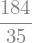

In [13]:
sv.ParametricIntegral(div,reg)

## Exercicos:

1- Seja 
$$
\vec F(x, y, z) = (\sin(x)\cos^2(y), \sin^3(y) \cos^4(z), \sin^5(z) \cos^6(x))
$$
e $M$ a superficie de um cubo
no primeiro octante delimitado por planos de coordenadas e planos $x = \frac{\pi}{2}, y = \frac{\pi}{2} \; \text{e}\; z = \frac{z}{2}$. Usando o teorema de divergencia, calcule o fluxo do $\vec F$ atraves da $M$.

2- Let $\vec r(x,y,z)=(x,y,z)$, and $\vec F(x,y,z)=\| \vec r\| \vec r$, where the double bars stand for magnitude, and let $M$ be the surface of the solid bounded by the paraboloid
$z = 25 - x^2 - y^2$ and the xy-plane. Use the Divergence Theorem to compute the outward flux of $\vec F$ through $M$. [Hint: Maybe Sympy can't compute the integral
exactly; you should use sp.nintegrate.]

3- Let $\vec r(x,y,z)=(x,y,z)$, and $\vec F(x,y,z) = \frac{\vec r}{\|r\|}$ , where the double bars stand for magnitude, and let $M$ be the surface of the solid bounded by the paraboloid $z = 26 - x^2 - y^2$ and the plane $z = 1$. Use the Divergence Theorem to compute the outward flux of $\vec F$ through $M$. [Hint: Maybe Sympy can't compute the integral
exactly; you should use sp.integrate.]

4- Use the Divergence Theorem to calculate the outward flux of
$\vec F( x, y, z ) = (z^2 x,\frac{1}{3} y^3 + \tan(z) , x^2 z + y^2)$  through the top half of the sphere $x^2 + y^2 + z^2 = 1$. [Hint: the surface is not closed; you need a closed surface to apply the Divergence Theorem. Make a closed surface by adding a flat bottom to the hemisphere -- and think carefully!]

5- Use the Divergence Theorem to calculate the outward flux of
$\vec F( x, y, z ) = (y^2 x+\text{e}^{yz}, x^2 y+\tan(z) , \frac{z^3}{3}+\frac{x^2}{5}+9y^2$  through the top half of the sphere $x^2 + y^2 + z^2 = 4$. [Hint: the surface is not closed; you need a closed surface to apply the Divergence Theorem. Make a closed surface by adding a flat bottom to the hemisphere -- and think carefully!]

6- In this problem, we will prove Archimedes's Principle: the buoyant force on a submerged object equals the weight of the fluid it displaces. We choose a system of coordinates so that z represents the depth below the fluid surface; that is,
the fluid surface is the xy-plane and the $z$-axis points down into the fluid. At every point where z≥0, the pressure is given by the scalar function $p(x,y,z)=\delta g z$, where $\delta $ is the density of the fluid (assumed constant) and $g$ is the acceleration due to gravity (also assumed constant).

Set up an integral to calculate the weight of the fluid displaced by $S$, where $S$ is any solid completely submerged in fluid (i.e. $z \ge 0$ at every point of $S$). This means
that you are to write a general integral that works for every $S$, not just to choose some particular $S$. [Hint: how much fluid does $S$ displace?]

b) Loosely, buoyant force is the integral of pressure. More precisely, the buoyant
force is given by the vector integral $ B = -\oint_{\partial S} (p \hat n) \text{d}\sigma$. Write a paragraph explain-
ing why this is a reasonable formula. [Hint: think of the integral as a sum of
many little pieces. Don't forget to explain the minus sign!]

c) By direct calculations, we can see that 
$$
p \hat n = p(\hat n_1, \hat n_2, \hat n_3) = (p \hat n_1,0,0) + (0,p \hat n_2,0) + (0,0,p \hat n_3) = (p \hat i \cdot \hat n) \hat i + (p \hat j \cdot \hat n) \hat j + (p \hat k \cdot \hat n) \hat k
$$. Use this substitution, rearrange, and use the Divergence Theorem (three times) to prove Archimedes's Principle.

# Teorema de Stokes

Exemplo: Calcule $\int_C \vec F. d\vec r$, onde $\vec F(x,y,z)=-y^2 \hat i + x \hat j + z^2 \hat k$ e $C$ é a curva da interseção do plano $y+z=2$ com o cilindro $x^2 + y^2 =1$. (Oriente $C$ no sentido anti-horario quando observado de cima.)

In [14]:
def cilindro(theta, z, rho=1):
  return rho*sp.cos(theta)*R.i +rho*sp.sin(theta)*R.j + z*R.k

cilindro(theta, z)

In [15]:
def plano(x,y):
  return x*R.i + y*R.j + (2-y)*R.k

plano(x,y)

In [16]:
pla = av.plot3d_parametric_surface(plano(x,y), (x, -2,2), (y,-2,2))
av.plot3d_parametric_surface(cilindro(theta, z), (theta, 0,2*np.pi), (z, -0.5, 3.3), fig=pla)

In [17]:
def F(x,y,z):
  return -y**2*R.i + x*R.j + z**2*R.k

F(x,y,z)

In [18]:
curlF = av.curl(F(x,y,z), (x,y,z))

curlF

$\iint \vec F \cdot d\vec S = \vec F(\vec r) \cdot (\vec r_u \times \vec r_v) dA$

In [19]:
dx = plano(x,y).diff(x)

dy = plano(x,y).diff(y)

cr = dx.cross(dy)

cr

In [20]:
integrando = curlF.dot(cr)

integrando

In [21]:
integrando_polar = integrando.subs(x,rho*sp.cos(theta)).subs(y, rho*sp.sin(theta))

integrando_polar

$dA = dx dy$

$dA = \rho d\rho d\theta$


In [22]:
sp.integrate(rho*integrando_polar, (rho, 0,1), (theta, 0, 2*sp.pi))